# Train word2vec from scratch 

Ce notebook est inspiré de https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/

- based on Gensim
- show similarity with Spacy 
- download W2V with Gensim data glove-wiki-gigaword-100
- dataset: stack exchange
- retrain W2V from scratch



In [1]:

!python -m spacy download en_core_web_md


     |████████████████████████████████| 96.4 MB 1.2 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=289e43c100ee72ff1a582c6d59838f80632b3f699987a149d19ab7f453cfed31
  Stored in directory: /tmp/pip-ephem-wheel-cache-5s1v7_jt/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [2]:
import pandas as pd
import numpy as np
import spacy

# nlp = spacy.load("en_core_web_md")

# dataset StackExchange on data 


In [3]:
import en_core_web_md
nlp = en_core_web_md.load()

In [4]:
# load dataset
url = "https://um6p-datascience.s3.eu-west-3.amazonaws.com/datasets/StatsExchange.csv"
df = pd.read_csv(url)
df.shape


(50000, 5)

In [5]:
df= df[['Title', 'Text']]

In [6]:
df.sample(5)

,Title,Text
26843,NaN,Nice explanation. Did you find anything about...
13913,NaN,@Matt - I think `Proc SGPLOT` roxxx.
40547,NaN,http://davegiles.blogspot.com/2012/02/minimizi...
42100,NaN,@whuber: What you were saying here refers to P...
42342,NaN,"@AVB: to make this more interesting, let's say..."


In [7]:
text = "Apple and banana are similar, Pasta and Hippo are not"
doc = nlp(text)


In [8]:
for d in doc: 
    print(d, d.text, d.lemma_, d.lang_)

Apple Apple Apple en
and and and en
banana banana banana en
are are be en
similar similar similar en
, , , en
Pasta Pasta Pasta en
and and and en
Hippo Hippo Hippo en
are are be en
not not not en


In [9]:
apple = doc[0]
banana = doc[2]
pasta = doc[6]

In [10]:
apple.similarity(banana)

0.5831845

In [11]:
apple.similarity(pasta)

0.35930964

In [12]:
apple.vector



array([-3.6391e-01,  4.3771e-01, -2.0447e-01, -2.2889e-01, -1.4227e-01,
        2.7396e-01, -1.1435e-02, -1.8578e-01,  3.7361e-01,  7.5339e-01,
       -3.0591e-01,  2.3741e-02, -7.7876e-01, -1.3802e-01,  6.6992e-02,
       -6.4303e-02, -4.0024e-01,  1.5309e+00, -1.3897e-02, -1.5657e-01,
        2.5366e-01,  2.1610e-01, -3.2720e-01,  3.4974e-01, -6.4845e-02,
       -2.9501e-01, -6.3923e-01, -6.2017e-02,  2.4559e-01, -6.9334e-02,
       -3.9967e-01,  3.0925e-02,  4.9033e-01,  6.7524e-01,  1.9481e-01,
        5.1488e-01, -3.1149e-01, -7.9939e-02, -6.2096e-01, -5.3277e-03,
       -1.1264e-01,  8.3528e-02, -7.6947e-03, -1.0788e-01,  1.6628e-01,
        4.2273e-01, -1.9009e-01, -2.9035e-01,  4.5630e-02,  1.0120e-01,
       -4.0855e-01, -3.5000e-01, -3.6175e-01, -4.1396e-01,  5.9485e-01,
       -1.1524e+00,  3.2424e-02,  3.4364e-01, -1.9209e-01,  4.3255e-02,
        4.9227e-02, -5.4258e-01,  9.1275e-01,  2.9576e-01,  2.3658e-02,
       -6.8737e-01, -1.9503e-01, -1.1059e-01, -2.2567e-01,  2.41

# Gensim



In [13]:
import gensim
from gensim.test.utils import datapath
import gensim.downloader as api
glove = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [14]:
glove.most_similar('car')

[('vehicle', 0.8630838394165039),
 ('truck', 0.8597878217697144),
 ('cars', 0.837166965007782),
 ('driver', 0.8185911178588867),
 ('driving', 0.7812635898590088),
 ('motorcycle', 0.7553156614303589),
 ('vehicles', 0.7462256550788879),
 ('parked', 0.7459464073181152),
 ('bus', 0.737270712852478),
 ('taxi', 0.7155268788337708)]

# on repart de zero

In [15]:
import os
import sys
import re
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser, Phrases

In [16]:
df.shape

(50000, 2)

In [17]:
# clean up the code
from tqdm import tqdm

df['tokens'] = ''

sentences = []

# Go through each text in turn
for i,d in tqdm(df.iterrows()):
    try:
        sentences = [re.sub(pattern=r'[\!"#$%&\*+,-./:;<=>?@^_`()|~=]', 
                            repl='', 
                            string=x
                        ).strip().split(' ') for x in d.Text.split('\n') ]
        sentences = [x for x in sentences if x != ['']]
        df.loc[i, 'tokens'] = sentences
    except:
        df.loc[i, 'tokens'] = np.NaN


0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)
50000it [00:14, 3435.03it/s]


In [18]:
df.sample(5).tokens

11554    [[teucer, what, do, you, mean, by, simulate, Y...
46366    [[The, question, is, too, generalvague, Please...
42885    [[Then, you, could, model, the, number, of, cl...
30327    [[Related, httpstatsstackexchangecomquestions1...
39544    [[Your, answer, is, ok, if, we, are, talking, ...
Name: tokens, dtype: object

In [19]:
all_sentences = []
for i,d in df.iterrows():
    all_sentences += d.tokens

In [20]:
all_sentences

[['Although',
  "I've",
  'accepted',
  'an',
  'answer',
  'I',
  'would',
  'recommend',
  'that',
  'interested',
  'people',
  'should',
  'look',
  'at',
  'all',
  'the',
  'answers'],
 ['did', 'you', 'try', 'google', 'wikipedia', 'first'],
 ['httpenwikipediaorgwikiNormaldistribution'],
 ['Could',
  'be',
  'a',
  'poster',
  'child',
  'fo',
  'argumentative',
  'and',
  'subjective',
  '',
  'At',
  'the',
  'least',
  'need',
  'to',
  'define',
  "'valuable'"],
 ['Maybe',
  'the',
  'focus',
  "shouldn't",
  'be',
  'on',
  'valuable',
  'but',
  'rather',
  'pros',
  'and',
  'cons',
  'of',
  'each',
  'project'],
 ['Or',
  'maybe',
  'even',
  'How',
  'X',
  'will',
  'help',
  'you',
  'get',
  'Y',
  'done',
  'fastercheaper',
  'and',
  'kill',
  'the',
  'germs',
  'that',
  'cause',
  'bad',
  'breath'],
 ['Are',
  'you',
  'interested',
  'in',
  'whether',
  'the',
  'distributions',
  'are',
  'of',
  'a',
  'different',
  'form',
  'eg',
  'normal',
  'poisson',


In [21]:
model = Word2Vec(all_sentences, 
                 min_count=3,   # Ignore words that appear less than this
                 size=50,      # Dimensionality of word embeddings
                 window=9,      # Context window for words during training
                 iter=20)       # Number of epochs training over corpus

In [22]:
model.wv['bet']

array([ 0.795615  , -0.86317223,  0.10181107,  1.8477948 ,  0.6047803 ,
       -3.135464  ,  1.7151036 ,  1.1409461 , -0.5648675 ,  0.463727  ,
        0.5371609 ,  0.46405303,  0.21390021, -0.8202148 , -1.397377  ,
       -0.01515503,  1.2947994 ,  0.62678516,  0.96400785,  0.23847991,
        0.4984685 ,  1.9502792 , -0.20828469, -0.51299137, -0.4466364 ,
       -0.25438032,  0.7408871 , -1.5304372 ,  2.3528404 , -0.24568315,
        0.36216268, -2.2286747 ,  0.30680537,  0.32879648, -0.6880637 ,
        2.3044827 ,  0.10042512,  1.9964052 , -0.90467054,  0.7040246 ,
        1.1726174 ,  1.8028114 , -0.55873513, -0.10825662,  0.92002237,
        1.7562057 ,  0.9659048 , -0.4643105 , -0.852333  , -0.6031485 ],
      dtype=float32)

In [23]:
model.wv.vocab

{'Although': <gensim.models.keyedvectors.Vocab at 0x7fb42a2489d0>,
 "I've": <gensim.models.keyedvectors.Vocab at 0x7fb4127445d0>,
 'accepted': <gensim.models.keyedvectors.Vocab at 0x7fb42b45af90>,
 'an': <gensim.models.keyedvectors.Vocab at 0x7fb400d18f10>,
 'answer': <gensim.models.keyedvectors.Vocab at 0x7fb400d185d0>,
 'I': <gensim.models.keyedvectors.Vocab at 0x7fb400d18f50>,
 'would': <gensim.models.keyedvectors.Vocab at 0x7fb400d18990>,
 'recommend': <gensim.models.keyedvectors.Vocab at 0x7fb400d18bd0>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7fb400d18890>,
 'interested': <gensim.models.keyedvectors.Vocab at 0x7fb400d18710>,
 'people': <gensim.models.keyedvectors.Vocab at 0x7fb400d18810>,
 'should': <gensim.models.keyedvectors.Vocab at 0x7fb400d183d0>,
 'look': <gensim.models.keyedvectors.Vocab at 0x7fb400d18590>,
 'at': <gensim.models.keyedvectors.Vocab at 0x7fb400d188d0>,
 'all': <gensim.models.keyedvectors.Vocab at 0x7fb400d187d0>,
 'the': <gensim.models.keyedvectors.V

In [24]:
df.Text.sample(10).values

array(["Can you please clarify exactly what your question is? You seem to be indicating there is something wrong with your AIC/BIC values but I'm not sure what you're referring to.",
       'Why not just remove the mean (and maybe divide by the standard devation), and then do this? Then the results would be much more about the shape, and less about the magnitude...',
       "That's an interesting solution, but what are the alternatives that the BP test would have power against? I guess that you could test against a polynomial function of x, depending upon how many data points the OP has. I'm not familiar with the FK test that you mention.",
       'Thanks for the explanation.  So then it seems that I have interpreted their results incorrectly as I thought they had run their experiment multiple times over the entire dataset.  I realize now that the confidence interval is based on a single experiment over the dataset.',
       'Thanks for great info. I was actually implementing hierarchi

In [25]:
model.most_similar('bootstrap')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('resampling', 0.7818246483802795),
 ('simulation', 0.7248395085334778),
 ('bootstrapping', 0.7144970893859863),
 ('crossvalidation', 0.6815324425697327),
 ('rejection', 0.6363370418548584),
 ('Carlo', 0.6285955309867859),
 ('Monte', 0.6284594535827637),
 ('sampling', 0.6031703352928162),
 ('parametric', 0.5879226326942444),
 ('sample', 0.5808088779449463)]

In [26]:
glove.most_similar('bootstrap')

[('sanitization', 0.5344903469085693),
 ('feedforward', 0.5217914581298828),
 ('electrophoresis', 0.5094643235206604),
 ('ligation', 0.5003780126571655),
 ('self-assessment', 0.4963890612125397),
 ('demethylation', 0.495978444814682),
 ('annotation', 0.49446356296539307),
 ('closed-loop', 0.4927721917629242),
 ('murambatsvina', 0.49150824546813965),
 ('refactoring', 0.48975786566734314)]

In [27]:
# taille du vocab
len(model.wv.vocab)



17810

In [28]:
len(glove.vocab)

400000

In [29]:
vocab = list(model.wv.vocab.keys())[::100]
len(vocab)

179

In [30]:

embedding_clusters = []
word_clusters = []

# take 1 words every 100 words
vocab = list(model.wv.vocab.keys())

for word in vocab:
    word_clusters.append([word])
    embedding_clusters.append([model.wv[word]])



In [31]:
embedding_clusters[0][0]

array([ 0.99785227, -1.5205486 , -0.20603421, -1.8766961 ,  4.8569336 ,
       -2.8142688 ,  0.06601543,  3.1391728 ,  1.5282    ,  0.1452036 ,
       -2.6119232 , -0.6287025 , -2.904366  , -0.6315569 , -2.5020673 ,
        1.7686541 , -1.040171  , -0.6324567 , -1.4021578 , -1.6877187 ,
       -1.1540772 , -1.217923  , -1.5891669 ,  2.5798564 ,  0.18579252,
       -0.89912695, -0.03225836,  1.7130365 ,  1.8566722 ,  3.4196208 ,
        1.0262285 , -0.8488975 ,  0.19255175,  0.5914295 , -1.8522886 ,
       -1.6373469 , -1.5780222 ,  1.3700545 , -1.8960263 , -0.21669039,
       -2.5732262 , -1.0187672 , -2.2100713 , -2.684578  ,  2.0764992 ,
        0.6690379 ,  1.8255777 , -0.38056833,  0.41424465,  0.9205567 ],
      dtype=float32)

In [32]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=88)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


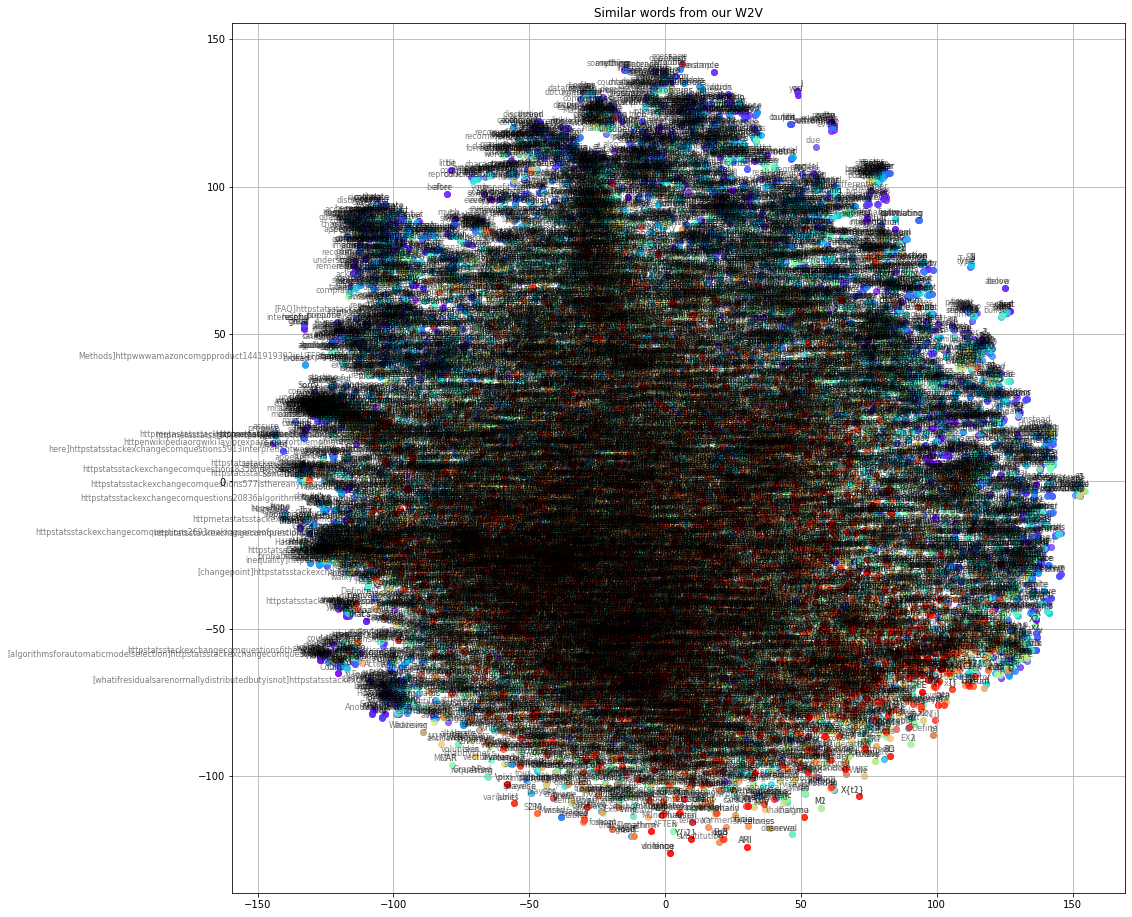

In [33]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a):
    plt.figure(figsize=(16, 16))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', size=8)
    # plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    plt.show()


tsne_plot_similar_words('Similar words from our W2V', vocab, embeddings_en_2d, word_clusters, 0.7)
